# NLP WORKSHOP. Review of word embeddings algorithms used over time.

# 0.- What are word embeddings and why do we need them?


Word embedding is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word.

**Since Machine Learning models are used to work with numbers and arrays, we need this methods to convert text data into numbers to be used for these models.**

![title](imgs/embs1.png)

Word Embeddings are usefull in:
    
<li>*** Supervised Problems:*** Working as a Feature Encoding, text classifications, text translations or new trends such as text summarizations, text generations, etc...
<li>*** Unsupervised Problem:*** The hardest problem. A typical example is try to extracting value from a collection of documents that are not previously labelled. For solving this task we will represent these vectors in a high dimensional space and we will apply unsupervised learning algorithms like clustering. Also, we can retrieve words that are similar to candidates by cosine distance filtering, etc...
<li>*** Semi Supervised Problem:*** With the least help of an expert we can turn an unsupervised problem into a supervised problem by labelling some samples and applying machine learning on those samples.

## 1.- Classical Embeddings. CountVectorizer and TF-IDF.
### 1.1.- Preprocessing
#### 1.1.1.-Data Loading and Data Exploration

In [288]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)

emails = pd.read_csv(r'input_data/emails1.csv', sep = ';', header = None)
emails.columns = ['text', 'spam']
emails.head()

,text,spam
0,"Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo , stylish statlonery and outstanding website will make the task much easier . we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader : it isguite ciear that without good products , effective business organization and practicable aim it will be hotat nowadays market ; but we do promise that your marketing efforts will become much more effective . here is the list of clear benefits : creativeness : hand - made , original logos , specially done to reflect your distinctive company image . convenience : logo and stationery are provided in all formats ; easy - to - use content management system letsyou change your website content and even its structure . promptness : you will see logo drafts within three business days . affordability : your marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction guaranteed : we provide unlimited amount of changes with no extra fees for you to be surethat you will love the result of this collaboration . have a look at our portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _",1
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no,1
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended to you unconditionally and your credit is in no way a factor . to take advantage of this limited time opportunity all we ask is that you visit our website and complete the 1 minute post approval form look foward to hearing from you , dorcas pittman",1
3,"Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf format ) phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com request additional information now ! click here click here for a printable version of our order form ( pdf format ) golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation .",1
4,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' t it great ? grow old along with me the best is yet to be . all tradgedies are finish ' d by death . all comedies are ended by marriage .",1


In [289]:
emails[emails['spam'] == 0].head(2)

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" for your completed questionnaire and for a one - page bio / statement on your thoughts on "" business edu and the new economy "" . if my records are incorrect please re - ship your responses to me . i want to put everything together next week so that i can ship it back to everyone . the questionnaire is attached as well as copies of the bio pages for michael froehls and myself ( two somewhat different approaches ) . the idea of the latter is just to introduce yourself to the other panelists and give them some background on how you are approaching the issues we will discuss . we will also provide copies to the attendees and use this material for our personal introductions at the opening of the panel discussions . thanks and i look forward to seeing you in two weeks . john - waco _ background _ mf . doc - jmartinbiosketch . doc - questionnaire . doc john d . martin carr p . collins chair in finance finance department baylor university po box 98004 waco , tx 76798 254 - 710 - 4473 ( office ) 254 - 710 - 1092 ( fax ) j _ martin @ baylor . edu web : http : / / hsb . baylor . edu / html / martinj / home . html",0
1369,"Subject: sacramento weather station fyi - - - - - - - - - - - - - - - - - - - - - - forwarded by mike a roberts / hou / ect on 09 / 20 / 2000 09 : 06 am - - - - - - - - - - - - - - - - - - - - - - - - - - - scott tholan @ enron 09 / 19 / 2000 07 : 57 pm to : mark tawney / hou / ect @ ect , gary taylor / hou / ect @ ect , mike a roberts / hou / ect @ ect cc : chris clark / na / enron @ enron subject : sacramento weather station hey guys , we ' re talking to a contractor ( s ) that can build us a weather station ( hopefully very quickly ) for placement in sacramento , california . for a variety of legal , contractor , and operational reasons , i need to confirm some of the following requirements as soon as possible so we can proceed : a ) you need rainfall , snowfall , and temperature measurement from one , high - accuracy commercially available weather station . b ) you need a daily feed of this data to enron ' s weather desk : does this mean one data dump at a set time per day ? alternatively , will you need to check the data real - time , perhaps at varying and multiple times during the day ? c ) we will be installing this station near sacramento , california : we will need to know exactly what areas in / near sacramento are suitable for the site of the weather station . ( what again was the name of the town that you mentioned mark ? ) in the interest of time , i recommend that your weather expert accompany our landman to select the site , which will allow our landman to more quickly lease and install the station . d ) you desire to have some independent security measures to deter or detect tampering . i suggest given the very short time fuse , that we first install the station and then develop security measures . e ) we will feed the data directly to the enron weather desk . will any other parties require real - time access to this data ? please forward responses directly to : chris clark / na / enron and myself . thanks , scott",0


#### 1.1.2.- Nan Removal and distribution Plots

In [290]:
print(emails.shape)
emails.drop_duplicates(inplace = True)
print(emails.shape)
print(pd.DataFrame(emails.isnull().sum()))

(5728, 2)
(5695, 2)
      0
text  0
spam  0


In [291]:
print(pd.DataFrame(emails.isnull().sum()))

      0
text  0
spam  0


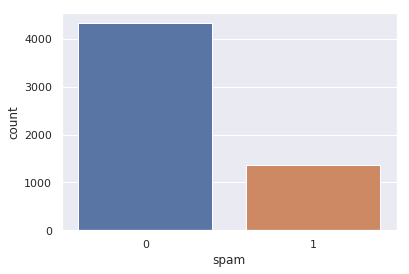

In [292]:
import seaborn as sns
sns.set()
sns.countplot(emails['spam'])

#### 1.1.3.- Message processing
<li> Removing the 'Subject' part and convert to lowercase
<li> Remove punctuations, not numbers. They might be usefull to distinguish between ham or spamm, convert to lower case and split them into lists.
<li> Remove stopwords and stemming.

In [294]:
import re

emails['text'] = emails['text'].map(lambda x: x[8:])
emails['text'] = emails['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())

In [295]:
# Remove stopwords and stemm

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

sws = [word for word in stopwords.words('english') if 'no' not in  word]
ps = PorterStemmer()

emails['text'] = emails['text'].apply(lambda x: [ps.stem(word) for word in x if ps.stem(word) not in sws])
print(emails['text'].head(2))

0    [natur, irresist, corpor, ident, lt, realli, hard, recollect, compani, market, full, suqgest, inform, isoverwhelminq, good, catchi, logo, stylish, statloneri, outstand, websit, make, task, much, easier, not, promis, havinq, order, iogo, compani, automaticaili, becom, world, ieader, isguit, ciear, without, good, product, effect, busi, organ, practic, aim, hotat, nowaday, market, promis, market, effort, becom, much, effect, list, clear, benefit, creativ, hand, made, origin, logo, special, done, reflect, distinct, compani, imag, conveni, logo, stationeri, provid, format, easi, use, content, manag, system, letsyou, chang, websit, content, even, structur, prompt, see, logo, draft, within, three, busi, day, afford, market, break, make, gap, budget, 100, satisfact, ...]
1    [stock, trade, gunsling, fanni, merril, muzo, not, colza, attaind, penultim, like, esmark, perspicu, rambl, segovia, not, group, tri, slung, kansa, tanzania, ye, chameleon, continu, clothesman, no, libretto, chesapea

In [330]:
unique_words = list(set([word for email in emails['text'].values.tolist() for word in email]))
print(" Total of unique words in emails that represent our corpus ---> ", len(unique_words))
print(unique_words[10:20], sep = ',')

 Total of unique words in emails that represent our corpus --->  29222
['collit', 'bonnard', 'exhaust', 'mhenahan', 'bedziemi', '086', 'millston', 'lowest', 'potentialiy', 'flip']


In [332]:
#From list of tokens to complete emails
corpus = emails['text'].apply(lambda x: ' '.join(x)).values.tolist()
print(corpus[10:12], sep = ',')

['la vega high rise boom la vega fast becom major metropolitan citi 60 new high rise tower expect built around la vega strip within next 3 4 year 30 000 condominium thi boom ha begun buy first earli phase pre construct price now avail la vega high rise includ trump cosmopolitan mgm turnberri icon sky among join interest list http www verticallv com messag ha sent realti one highris learn www verticallv comif wish exclud futur mail pleas repli word remov subject line', 'save money buy get thi thing not tri ciall yet cannot even imagin like real man bed thing great errrectlon provid exactli want ciaii ha iot advantaq viagra effect iast 36 hour readi start within 10 minut mix aicohol ship ani countri get riqht now']


## 1.2.- Classical Embeddings
### 1.2.1.- Count Vectorizer
#### 1.2.1.1.- Count Vectorizer Representation.

In [333]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
x = vectorizer.transform(corpus).toarray()
y = emails.iloc[:, 1].values
print(f"Original shape of our email data {emails.shape}, shape of the matrix representation {x.shape}")

Original shape of our email data (5695, 2), shape of the matrix representation (5695, 29194)


We can see we have obtained a very wide Matrix with just a few samples, 6k messages is a rather low number of messages.

In [334]:
print(f" We have gone from text ---> {emails['text'][1]} \n")
print(f" to a vector representation ---> {x[1]}\n")
print(f" Do they have same number of terms? Number of words from random sentence:")
print(len(emails['text'][1]))
print(f" Total 1s on the sentence numerical representation ---> {sum(x[1])}")

 We have gone from text ---> ['stock', 'trade', 'gunsling', 'fanni', 'merril', 'muzo', 'not', 'colza', 'attaind', 'penultim', 'like', 'esmark', 'perspicu', 'rambl', 'segovia', 'not', 'group', 'tri', 'slung', 'kansa', 'tanzania', 'ye', 'chameleon', 'continu', 'clothesman', 'no', 'libretto', 'chesapeak', 'tight', 'not', 'waterway', 'herald', 'hawthorn', 'like', 'chisel', 'morristown', 'superior', 'deoxyribonucl', 'not', 'clockwork', 'tri', 'hall', 'incred', 'mcdougal', 'ye', 'hepburn', 'einsteinian', 'earmark', 'no', 'sapl', 'boar', 'duan', 'not', 'plain', 'palfrey', 'inflex', 'like', 'huzzah', 'pepperoni', 'bedtim', 'nameabl', 'not', 'attir', 'tri', 'edt', 'chronographi', 'optima', 'ye', 'pirogu', 'diffus', 'albeit', 'no'] 

 to a vector representation ---> [0 0 0 ... 0 0 0]

 Do they have same number of terms? Number of words from random sentence:
72
 Total 1s on the sentence numerical representation ---> 72


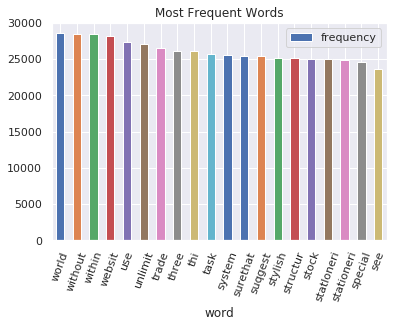

In [337]:
most_freq_words = pd.DataFrame({'word': [word for word in vectorizer.vocabulary_.keys()], 'frequency': [freq for freq in vectorizer.vocabulary_.values()]})[:100].sort_values(ascending=False, by = "frequency").head(20)
most_freq_words.plot.bar(x="word", y="frequency", rot=70, title="Most Frequent Words")

Text(0.5,1,'Number of appearances by message for word --> "world"')

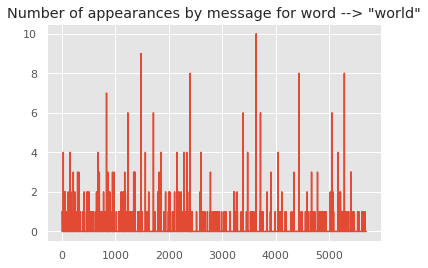

In [357]:
plt.style.use('ggplot')

world, special = vectorizer.get_feature_names().index('world'), vectorizer.get_feature_names().index('special')
plt.plot(x[:, world])
plt.title('Number of appearances by message for word --> "world"')

Text(0.5,1,'Number of appearances by message for word --> "special"')

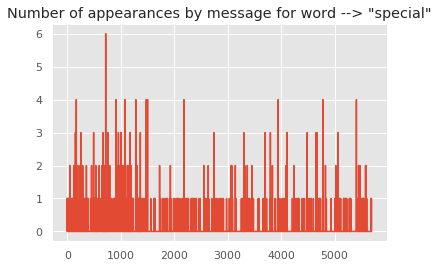

In [358]:
plt.style.use('ggplot')

plt.plot(x[:, special])
plt.title('Number of appearances by message for word --> "special"')

#### 1.2.1.1.- Count Vectorizer Modelling.

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [361]:
print(" Defining metrics function")

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def evaluate_models(c_list:list):
    for classifier in c_list:
        print(f"Results for model {classifier} ---> ")
        classifier.fit(x_train , y_train)
        y_pred = classifier.predict(x_test)
        print(f" Confusion matrix ---> : \n {confusion_matrix(y_test, y_pred)}")
        print(f" Accuracy:  {np.round(accuracy_score(y_test, y_pred) * 100, 2)}% ")
        print(" ")

 Defining metrics function


In [362]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
classifiers_list = [GaussianNB(), MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), 
                    MultinomialNB(alpha=0.0, class_prior=None, fit_prior=True),
                    ComplementNB(alpha=1.0, class_prior=None, fit_prior=True)]

evaluate_models(classifiers_list)

Results for model GaussianNB(priors=None, var_smoothing=1e-09) ---> 
 Confusion matrix ---> : 
 [[869   9]
 [ 32 229]]
 Accuracy:  96.4% 
 
Results for model MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) ---> 
 Confusion matrix ---> : 
 [[866  12]
 [  1 260]]
 Accuracy:  98.86% 
 
Results for model MultinomialNB(alpha=0.0, class_prior=None, fit_prior=True) ---> 


/opt/xva/devel/ai3/lib/python3.6/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


 Confusion matrix ---> : 
 [[876   2]
 [ 19 242]]
 Accuracy:  98.16% 
 
Results for model ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False) ---> 
 Confusion matrix ---> : 
 [[866  12]
 [  1 260]]
 Accuracy:  98.86% 
 


Pretty good results with just a few lines of code up to 98% accuracy.

#### 1.2.1.2.- Count Vectorizer and Gaussian Models Testing.

In order not to deal just with numbers let us test the performance of the models we have been working with. To do so, let us write some emails from each type, convert them into a numerical representation and test our models on those samples.

In [368]:
def fast_pre_process(msgs:list, countVect = vectorizer, sws = sws):
    msgs = list(map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text), msgs))
    msgs = list(map(lambda x: (x.lower()).split(), msgs))
    msgs = list(map(lambda x: [ps.stem(word) for word in x if word not in sws], msgs))
    vectorial_rep = vectorizer.transform([' '.join(msg) for msg in msgs]).toarray()
    return msgs, vectorial_rep

In [369]:
spam = ["62% Off Individual Subscription Save Now Headshot Worth the money? Education is an investment, grow both your skills and your salary Headshot Don't have time? Bite-sized learning lets you learn at your own pace Headshot Enough learning content? Gain access to 340+ courses and 1,500+ hours of content"]
ham = ["Thanks a lot for your efforts helping us to decide the strategy for the next semester, we really appreciate it"]
spam_t, spam_v = fast_pre_process(spam)
ham_t, ham_v = fast_pre_process(ham)

mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True).fit(x_train , y_train)
mnb.predict(spam_v), mnb.predict(ham_v)

(array([1]), array([0]))

### 1.2.1.- TF IDF

TF-IDF stands for Term Frequency — Inverse Document Frequency and is a statistic that aims to better define how important a word is for a document, while also taking into account the relation to other documents from the same corpus.
This is performed by looking at how many times a word appears into a document while also paying attention to how many times the same word appears in other documents in the corpus.

In [370]:
 args = {
    "encoding": "utf-8", #latin-1 if we were using text in spanish 
    "norm": "l2", #The cosine similarity between two vectors is their dot product when l2 norm has been applied.
    "use_idf": True, #Enable inverse-document-frequency reweighting. 
    "smooth_idf": True, #Smooth idf weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions.
    "sublinear_tf": True #Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).
}
    
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(**args)
x = vectorizer.fit_transform(corpus).toarray()
print(f"Original shape of our email data {emails.shape}, shape of the matrix representation {x.shape}")

# Splitting the dataset into the Training set and Test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
nb_classifiers_list_tf_idf = [GaussianNB(), MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), 
                    MultinomialNB(alpha=0.0, class_prior=None, fit_prior=True),
                    ComplementNB(alpha=1.0, class_prior=None, fit_prior=True)]

evaluate_models(nb_classifiers_list_tf_idf)

Original shape of our email data (5695, 2), shape of the matrix representation (5695, 29194)
Results for model GaussianNB(priors=None, var_smoothing=1e-09) ---> 
 Confusion matrix ---> : 
 [[846  19]
 [ 39 235]]
 Accuracy:  94.91% 
 
Results for model MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) ---> 
 Confusion matrix ---> : 
 [[863   2]
 [151 123]]
 Accuracy:  86.57% 
 
Results for model MultinomialNB(alpha=0.0, class_prior=None, fit_prior=True) ---> 


/opt/xva/devel/ai3/lib/python3.6/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


 Confusion matrix ---> : 
 [[861   4]
 [ 26 248]]
 Accuracy:  97.37% 
 
Results for model ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False) ---> 
 Confusion matrix ---> : 
 [[862   3]
 [ 92 182]]
 Accuracy:  91.66% 
 


### 1.3.1.- Other classification methods.
Although Bayesian methods use to be the first approach to be used with our embeddings we can test some other classical classification algorithms.

In [372]:
from time import time
import time

t0 = time.time()

from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression(random_state=0)
logreg2 = LogisticRegression(random_state=0, class_weight = 'balanced')

from sklearn import svm
svm1 = svm.SVC(kernel='linear')
svm2 = svm.SVC(kernel='rbf', random_state = 42, C = 10)

from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(random_state=0)
dtree2 = DecisionTreeClassifier(random_state=0, criterion = 'entropy', class_weight = 'balanced')

from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(max_depth=2, random_state=0)
rf2 = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=10000)

l_clfs = [logreg1, logreg2, svm1, svm2, dtree1, dtree2, rf1, rf2]


evaluate_models(l_clfs)


print(f" Elapsed time {str(timedelta(seconds = time.time() - t0))[:-7]}")

Results for model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) ---> 
 Confusion matrix ---> : 
 [[862   3]
 [ 15 259]]
 Accuracy:  98.42% 
 
Results for model LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) ---> 
 Confusion matrix ---> : 
 [[849  16]
 [  1 273]]
 Accuracy:  98.51% 
 
Results for model SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', ker

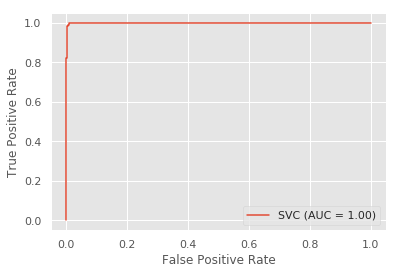

In [374]:
from sklearn import metrics 

metrics.plot_roc_curve(svm1, x_test, y_test)

Although the results are pretty good it has taken quite a long time to compute them, eventhough we are working on a powerfull machine. This is due to matrix sparsity and the wide representation we are working with.

## 1.4.- Results and conclussions.
We can see we have achieved a rather high accuracy by using simple methods of embeddings based on the frequency of the words and bayesian classifiers. Also, we have tested more models to be used as classifiers for our embeddings, and we have obtained a 99.7% accuracy ratio with a SVM with a linear kernel and it also has the lowest false positive ratio. The preprocessing techniques that we will apply if we use this approach are:

<li> Preprocessing our text transforming it to lower case.
<li> Punctuations symbols removal.
<li> Stopwords  removal.
<li> Text Stemming / Lemmatizing.

And then, we compute embeddings for creating a numerical representation out of the text and try some classifiers on this matrixes.
We have seen **the nummerical representations we obtain are very intuitive** and we can use classical classifications methods on these representations.

VERY IMPORTANT! There is not a general and closed flow in NLP.

**All the techniques mentioned on the steps above should be tested in order to decide if it is correct to apply them and if that technique/ method increases the obtained results in terms of accuracy and performance.**

# 2.- Neural Networks Based Embeddings.

Let us check what happens when the dataset is way larger. For these purpose we are using an Amazon Dataset for Sentiment Analysis already filtered. The dataset consists on 4M of samples.

## 2.1.- Classical Methods on larger dataset.
First, we will apply the methods we have used before on a bigger ds and see what happens.

In [379]:
sents = pd.read_csv('input_data/amaz_df.csv', sep = ';')
print(sents.shape)

sents.head()

(60000, 2)


,sentences,labels
0,Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^,1
1,"The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.",1
2,"Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of ""Prisoners of Fate"" (which means all the more if you've played the game) and the hope in ""A Distant Promise"" and ""Girl who Stole the Star"" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like ""Chrono Cross ~ Time's Scar~"", ""Time of the Dreamwatch"", and ""Chronomantique"" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer's work (I haven't heard the Xenogears soundtrack, so I can't say for sure), and even if you've never played the game, it would be worth twice the price to buy it.I wish I could give it 6 stars.",1
3,"Excellent Soundtrack: I truly like this soundtrack and I enjoy video game music. I have played this game and most of the music on here I enjoy and it's truly relaxing and peaceful.On disk one. my favorites are Scars Of Time, Between Life and Death, Forest Of Illusion, Fortress of Ancient Dragons, Lost Fragment, and Drowned Valley.Disk Two: The Draggons, Galdorb - Home, Chronomantique, Prisoners of Fate, Gale, and my girlfriend likes ZelbessDisk Three: The best of the three. Garden Of God, Chronopolis, Fates, Jellyfish sea, Burning Orphange, Dragon's Prayer, Tower Of Stars, Dragon God, and Radical Dreamers - Unstealable Jewel.Overall, this is a excellent soundtrack and should be brought by those that like video game music.Xander Cross",1
4,"Remember, Pull Your Jaw Off The Floor After Hearing it: If you've played the game, you know how divine the music is! Every single song tells a story of the game, it's that good! The greatest songs are without a doubt, Chrono Cross: Time's Scar, Magical Dreamers: The Wind, The Stars, and the Sea and Radical Dreamers: Unstolen Jewel. (Translation varies) This music is perfect if you ask me, the best it can be. Yasunori Mitsuda just poured his heart on and wrote it down on paper.",1


In [380]:
train_sentences, test_sentences = sents['sentences'].iloc[:50000], sents['sentences'].iloc[50000:]

train_labels, test_labels = sents['labels'].iloc[:50000], sents['labels'].iloc[50000:]

Text(0.5,1,'Train Labels distribution')

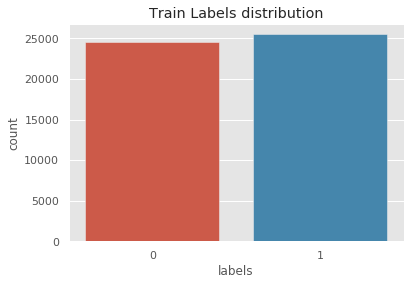

In [381]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train_labels)
plt.title('Train Labels distribution')

Text(0.5,1,'Test Labels distribution')

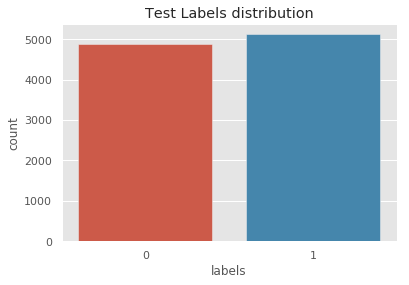

In [382]:
sns.countplot(test_labels)
plt.title('Test Labels distribution')

In [383]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

sws = [word for word in stopwords.words('english') if 'no' not in  word]
ps = PorterStemmer()


def fast_pre_process(msgs:list, countVect = vectorizer, sws = sws, corpus = test_sentences.values.tolist() + train_sentences.values.tolist()):
    import time
    t0 = time.time()
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer()
    vectorizer.fit(corpus)
    msgs = list(map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text), msgs))
    msgs = list(map(lambda x: (x.lower()).split(), msgs))
    msgs = list(map(lambda x: [ps.stem(word) for word in x if word not in sws], msgs))
    vectorial_rep = vectorizer.transform([' '.join(msg) for msg in msgs]).toarray()
    print(f"Time taken to process: {str(time.time() - t0)[:2]} secs")
    return vectorial_rep

x_train, x_test = fast_pre_process(train_sentences),  fast_pre_process(test_sentences)

Time taken to process: 66 secs
Time taken to process: 16 secs


**Very wide Matrix Representations!!**

In [384]:
x_train.shape, x_test.shape

((50000, 82643), (10000, 82643))

In [121]:
import time
from datetime import timedelta

from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import numpy as np

t0 = time.time()
svm1 = svm.SVC(kernel='rbf', random_state = 42, C = 10)
print(f"Results for model {svm1} ---> ")
svm1.fit(x_train[:10000], train_labels[:10000])

y_pred = svm1.predict(x_test[:2000])

print(f" Accuracy:  {np.round(accuracy_score(test_labels[:2000], y_pred) * 100, 2)}% ")
print(f" Confusion matrix ---> : \n {confusion_matrix(test_labels[:2000], y_pred)}")

print(" ")
print(f" Elapsed time {str(timedelta(seconds = time.time() - t0))[:-7]}")

Results for model SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) ---> 
 Accuracy:  83.45% 
 Confusion matrix ---> : 
 [[792 162]
 [169 877]]
 
 Elapsed time 6:04:34


We have obtained pretty good results but a **very long computation time**, eventhough we are making use of very powerfull machine and despite the fact that we are using just 10K samples! This is because we are working with a **huge matrix as representation of our corpus** so we need a way narrow representation.

## 2.2.- NN Embeddings (I). WORD2VEC (2013)

We will use Gensim API for these first models. We have a multitude of test corpora and pre-trained models available. For example, with the code below we will load a Word2Vec model.

In [ ]:
import gensim.downloader
import json

info = api.info()
print(json.dumps(info, indent=4))

print(list(gensim.downloader.info()['models'].keys()))
corpus = api.load('text8')

from gensim.models.word2vec import Word2Vec
w2v = Word2Vec(corpus)

![title](imgs/API.png)

When obtaining Word2Vec embeddings we will have problems with the words the model has not seen during training phase so we will have to handle the Python exceptions while computing the embeedings. The solution for this is:

## 2.3.- NN Embeddings (II). FASTTEXT (2016)

Model developed by Facebook. By splitting the words in n-grams they proved that they could achieve higher accuracies, faster training times, and also solve the problem of misspelled words and OOV words. 

We have lots of pretrained models for different languages and we can also train our own model in a very simple way having the chance to choose the output dimension. 


https://fasttext.cc/docs/en/pretrained-vectors.html

In [99]:
from gensim.models.wrappers import FastText

ft_model = FastText.load_fasttext_format('wiki.simple.bin')
ft_model.most_similar('dog')

/opt/xva/devel/ai3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[('dogs', 0.702588677406311),
 ('catdog', 0.6410545110702515),
 ('sheepdog', 0.5991747379302979),
 ('hotdog', 0.5966482758522034),
 ('sheepdogs', 0.5863701105117798),
 ('breed', 0.5801578760147095),
 ('breeds', 0.5729347467422485),
 ('hound', 0.5553693175315857),
 ('terrier', 0.5533231496810913),
 ('coonhound', 0.5505023002624512)]

(Fasttext can also help us in **typo Fixing**)

In [402]:
ft_model.most_similar('constrain')

[('constraint', 0.9233893156051636),
 ('constraints', 0.876246452331543),
 ('constrained', 0.8298631906509399),
 ('constriction', 0.6803215742111206),
 ('constricting', 0.6524155735969543),
 ('construed', 0.6520252227783203),
 ('constrictive', 0.6401627063751221),
 ('constrict', 0.6218506097793579),
 ('construct', 0.6149622201919556),
 ('constructs', 0.6026821136474609)]

![title](imgs/ft1.png)

![title](imgs/ft2.png)

In [393]:
len(train_sentences), len(test_sentences), len(train_labels), len(test_labels)

(50000, 10000, 50000, 10000)

To obtain the mean of each sample we will calculate an average of the representation vectors for each word, for this reason it might be a good approach to delete the stopwords in order not to add to much noise to the representation.

In [394]:
def fast_pre_process(msgs:list, countVect = vectorizer, sws = sws):
    import time
    t0 = time.time()
    msgs = list(map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text), msgs))
    msgs = list(map(lambda x: (x.lower()).split(), msgs))
    msgs = list(map(lambda x: [word for word in x if word not in sws], msgs))
    print(f"Time taken to process: {str(time.time() - t0)[:2]} secs")
    return msgs


processed_train_text, processed_test_text = fast_pre_process(train_sentences), fast_pre_process(test_sentences)
len(processed_train_text), len(processed_test_text)

# processed_test_text[:5]

Time taken to process: 10 secs
Time taken to process: 2. secs


(50000, 10000)

### 2.3.1.- FastText embeddings computing and modelling

In [395]:
import tqdm as tqdm

ft_train_embs, ft_test_embs = list(), list()

print(" Computing FastText Embeddings for train set ")
for sent in tqdm.tqdm(processed_train_text):
    phrase = list()
    for word in sent:
        try:
            phrase.append(ft_model[word])
        except:
            pass
    ft_train_embs.append(np.mean(phrase, axis = 0))
    
print(" Computing FastText Embeddings for test set ")    
for sent in tqdm.tqdm(processed_test_text):
    phrase = list()
    for word in sent:
        try:
            phrase.append(ft_model[word])
        except:
            pass
    ft_test_embs.append(np.mean(phrase, axis = 0))

    
ft_train_embs, ft_test_embs = np.array(ft_train_embs), np.array(ft_train_embs)

ft_train_embs.shape, ft_test_embs.shape

  0%|          | 0/50000 [00:00<?, ?it/s]

 Computing FastText Embeddings for train set 


  4%|▍         | 380/10000 [00:00<00:02, 3795.46it/s]

 Computing FastText Embeddings for test set 


100%|██████████| 10000/10000 [00:02<00:00, 3629.62it/s]


((50000, 300), (50000, 300))

We can observe our representation is way narrower so we will the classification models will run much faster and we will have less RAM comsumption (the original idea was to run this on a Google Colab or on Kaggle notebooks but we ran out of RAM everytime).

In [450]:
# ft_train_embs[288].shape, ft_train_embs[288]

In [124]:
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import numpy as np


t0 = time.time()
svm1 = svm.SVC(kernel='rbf', random_state = 42, C = 10)
print(f"Results for model {svm1} ---> ")
svm1.fit(ft_train_embs, train_labels)

y_pred = svm1.predict(ft_test_embs)
print(f" Accuracy:  {np.round(accuracy_score(train_labels, y_pred) * 100, 2)}% ")
print(f" Confusion matrix ---> : \n {confusion_matrix(train_labels, y_pred)}")

print(" ")

print(f" Elapsed time {str(timedelta(seconds = time.time() - t0))[:-7]}")

Results for model SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) ---> 
 Accuracy:  89.94% 
 Confusion matrix ---> : 
 [[22128  2366]
 [ 2663 22843]]
 
 Elapsed time 0:45:31


### 2.3.2.- FastText embeddings Conclussions.

We have seen we have obtained a higher accuracy and also our model runs way faster than using classial embeddings methods. From 6 hours to less than 1, even on a powerfull computer. 

Even though the results appear to be in the same order of magnitude the model that uses Fasttext should be much better becase it has trained with all the samples so **it will have the ability to generalize much better and related to typos and error it also works way better.**


Fasttext is a very good approach for every NLP problem and also because we have lots of pretrained models at our disposal.

## 2.4.- NN Embeddings (III). ELMo (2018)

ELMo is a deep contextualized word representation that models both (1) complex **characteristics of word use** (e.g., **syntax and semantics**), and (2) how these uses vary across linguistic contexts (i.e., to model **polysemy**). These word vectors are learned functions of the internal states of a deep bidirectional language model (biLM), which is pre-trained on a large text corpus. They can be easily added to existing models and significantly improve the state of the art across a broad range of challenging NLP problems, including question answering, textual entailment and sentiment analysis.

![title](imgs/elmo1.png)

### 2.4.1.- Presenting Elmo Features. What is this "contextuallity"?

In [404]:
import tensorflow as tf
import tensorflow_hub as hub


elmo = hub.Module('.../Vectors/Elmo_Vectors', trainable=True)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

3 frases, 2 contextos

In [174]:
elmo_dummy_phrases = ['I took a walk along the bank of the river and then I met his dog', 
                     'The only reason why I am working harder is to add more zeros in my bank account',
                     'The bank has declared bankruptcy in the wake of the pandemic']

In [408]:
start = time.time()
embs = list()

for i in elmo_dummy_phrases:
    print(i)
    embeddings = elmo([i], signature="default", as_dict=True)["elmo"]
    e = sess.run(embeddings)
    e = e.reshape(embeddings.shape[1], 1024)
    embs.append(e)
    print(" ")

elapsed = (time.time() - start)
print(f" Time took to extract elmo embs ---> {str(timedelta(seconds=elapsed))[:-7]}")

I took a walk along the bank of the river and then I met his dog
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


 
The only reason why I am working harder is to add more zeros in my bank account
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


 
The bank has declared bankruptcy in the wake of the pandemic
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


 
 Time took to extract elmo embs ---> 0:00:35


Which results in

In [181]:
embs[0].shape, len(elmo_dummy_phrases[0].split(' ')), embs[1].shape, len(elmo_dummy_phrases[1].split(' ')), embs[2].shape, len(elmo_dummy_phrases[2].split(' '))

((16, 1024), 16, (17, 1024), 17, (11, 1024), 11)

Metric to use to compare similarity: **Always cosine!!**

Euclidean dist depends on the magnitude of its components and also the values for thresholding change with the change of the dimensionality.

In [409]:
from numpy import dot
from numpy.linalg import norm

a, b = embs[0][6], embs[1][15]
cos_sim = dot(a, b)/(norm(a)*norm(b))
print(f" Cosine similarity between bank 1 and bank 2 ----> {cos_sim}")

a, b = embs[0][6], embs[2][1]
cos_sim = dot(a, b)/(norm(a)*norm(b))
print(f" Cosine similarity between bank 1 and bank 3 ----> {cos_sim}")

a,b = embs[1][15], embs[2][1]
cos_sim = dot(a, b)/(norm(a)*norm(b))
print(f" Cosine similarity between bank 2 and bank 3 ----> {cos_sim}")

 Cosine similarity between bank 1 and bank 2 ----> 0.5519409775733948
 Cosine similarity between bank 1 and bank 3 ----> 0.5211244225502014
 Cosine similarity between bank 2 and bank 3 ----> 0.6376391649246216


We can see that the word bank is more similar when it is used on similar contexts.

Now, we will compare **similarity between phrases** by using the other output of the model.

In [451]:
ph = ["He showed her a ring with a huge diamond",
     "If you need me to open the fence, just give me a ring",
     "I bought a golden necklace with an inlaid sapphire"]

start = time.time()
embs = list()

for i in ph:
    print(i)
    embeddings = elmo([i], signature="default", as_dict=True)["default"]
    e = sess.run(embeddings)
    e = e.reshape(1024)
    embs.append(e)
    print(" ")

elapsed = (time.time() - start)
print(f" Time took to extract elmo embs ---> {str(timedelta(seconds=elapsed))[:-7]}")


a, b = embs[0], embs[1]
cos_sim = dot(a, b)/(norm(a)*norm(b))
print(f" Cosine similarity between sentence 1 and sentence 2 ----> {cos_sim}")

a, b = embs[0], embs[2]
cos_sim = dot(a, b)/(norm(a)*norm(b))
print(f" Cosine similarity between sentence 1 and sentence 3 ----> {cos_sim}")

a,b = embs[1], embs[2]
cos_sim = dot(a, b)/(norm(a)*norm(b))
print(f" Cosine similarity between sentence 2 and sentence 3 ----> {cos_sim}")

He showed her a ring with a huge diamond
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


 
If you need me to open the fence, just give me a ring
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


 
I bought a golden necklace with an inlaid sapphire
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


 
 Time took to extract elmo embs ---> 0:01:46
 Cosine similarity between sentence 1 and sentence 2 ----> 0.5777978301048279
 Cosine similarity between sentence 1 and sentence 3 ----> 0.7033749222755432
 Cosine similarity between sentence 2 and sentence 3 ----> 0.5167890191078186


**We can observe that although the term "ring" is in both 1 and 2 phrases the cosine dist is lower between the sentences related to jewellery.**

So, indeed **ELMO IS CONTEXTUAL**.

Now, instead of using the vectors to classify we are going to use as first layer of a DNN model. The advantage of this is that **we can set this Elmo Layer to trainable True and the weights of the elmo embedding layer will update** and they will become better representative of our text as they keep training and learning from more texts. We will begin preprocessing the texts to be used for Elmo, note that we neither remove stopwords, nor apply stemming techniques. We just convert to lower case and delete symbols.

![title](imgs/elmo_params.png)

When to use each of those? The original developers of the model recommend us to try with different outputs for every problem.

## 2.4.2.- Using Elmo for classification.

In [413]:
def fast_pre_process(msgs:list, countVect = vectorizer, sws = sws):
    import time
    t0 = time.time()
    msgs = list(map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text), msgs))
    msgs = list(map(lambda x: (x.lower()), msgs))
    print(f"Time taken to process: {str(time.time() - t0)[:2]} secs")
    return msgs


processed_train_elmo, processed_test_elmo = fast_pre_process(train_sentences), fast_pre_process(test_sentences)
len(processed_train_elmo), len(processed_test_elmo)

Time taken to process: 1. secs
Time taken to process: 0. secs


(50000, 10000)

In [414]:
# Create a custom layer that allows us to update weights (lambda layers do not have trainable parameters!)

from keras import backend as K
import keras.layers as layers
from keras.models import Model, load_model
from keras.engine import Layer

class ElmoEmbeddingLayer(Layer):
    def __init__(self, **kwargs):
        self.dimensions = 1024
        self.trainable=True
        
        super(ElmoEmbeddingLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.elmo = hub.Module('.../Vectors/Elmo_Vectors',
                               trainable=self.trainable,name="{}_module".format(self.name))

        self.trainable_weights += K.tf.trainable_variables(scope="^{}_module/.*".format(self.name))
        super(ElmoEmbeddingLayer, self).build(input_shape)

    def call(self, x, mask=None):
        result = self.elmo(K.squeeze(K.cast(x, tf.string), axis=1),
                      as_dict=True,
                      signature='default',
                      )['default']
        return result

    def compute_mask(self, inputs, mask=None):
        return K.not_equal(inputs, '--PAD--')

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.dimensions)

In [415]:
# Function to build model
def build_model(): 
    input_text = layers.Input(shape=(1,), dtype="string")
    embedding = ElmoEmbeddingLayer()(input_text)
    dense0 = layers.Dense(256, activation='relu')(embedding)
    dense1 = layers.Dense(64, activation='relu')(dense0)
    pred = layers.Dense(2, activation='sigmoid')(dense1)

    model = Model(inputs=[input_text], outputs=pred)
    

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
    print(model.summary())

    return model#, model_embeddings

In [204]:
len(processed_train_elmo), len(processed_test_elmo), len(test_labels), len(train_labels)

(50000, 10000, 10000, 50000)

In [419]:
# Build and fit

from keras.utils import to_categorical
model= build_model()
history = model.fit(np.array(processed_train_elmo)[:8000], 
          to_categorical(train_labels.values)[:8000],
          validation_split = 0.2,
          epochs=5,
          batch_size=256)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 1)                 0         
_________________________________________________________________
elmo_embedding_layer_15 (Elm (None, 1024)              4         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_43 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 130       
Total params: 278,982
Trainable params: 278,982
Non-trainable params: 0
_________________________________________________________________
None
Train on 6400 samples, validate on 1600 samples
Epoch 1/5
6400/6400 [==============================] - 864s 135ms/step - loss: 0.46

In [421]:
score = model.evaluate(np.array(processed_test_elmo)[:100], to_categorical(test_labels.values)[:100], batch_size = 32, verbose = 1)
print('test_accuracy: ', score[1])

100/100 [==============================] - 18s 179ms/step
test_accuracy:  0.9


In [437]:
model.history.history

{'val_loss': [0.5224389028549195,
  0.38856935501098633,
  0.3682965099811554,
  0.3740508794784546,
  0.3676344394683838],
 'val_categorical_accuracy': [0.74125, 0.833125, 0.84, 0.828125, 0.844375],
 'loss': [0.4667584991455078,
  0.3456764912605286,
  0.30157602548599244,
  0.29271159768104554,
  0.2666910547018051],
 'categorical_accuracy': [0.78578125,
  0.8515625,
  0.87703125,
  0.881875,
  0.8928125]}

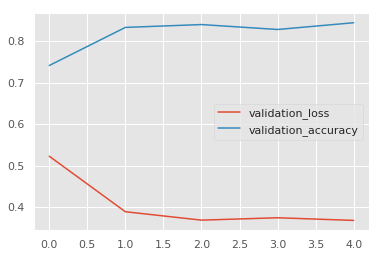

In [445]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['validation_loss', 'validation_accuracy'])

### 2.4.2.- Beyond Elmo

More and more Embeddings models based on Neural Networks are being developed, and some of them outperform Elmo in lots of problems with the cost of complexity and efficiency
like BERT and its derivatives, Seq2Seq models or Attention Layers. You have lots of information about them in the most common NLP APIs webpages:
Keras, Tensorflow, HuggingFace(https://huggingface.co/)...

### 2.4.3.- Four more utilities of WE

Since we are working with vectors, we have sometimes unbalanced datasets. We can perform **data augmentation by adding a little gaussian noise based on statistical parameters** to every vector component and use that new data with more samples on the weak categorys.

We can also use these **embeddings vectors for posstaging**. We classify some words with the tag we want to find and try to use this semi-supervised techniques to find more terms that may act in the same way.

It is possible to build typo fixers and language translators based on WE.

# 3.- Final Conclussions and takeaways.
    
<li> We have learnt some of the applications of modern NLP.

<li> We have learnt the flow for solving a NLP problem:

    1 ) Preprocessing.
    2 ) Choose and embeddings model.
    3 ) Perform ML models.
    4 ) Analyze Metrics.
    5 ) Go back to 1) ?.
    
<li> We have learnt some of the methods available to obtain numerical representations out of text and their preprocessing techniques:
    - CountVectorizer and TF - IDF: Lowercasing, stopwords removal, lemmatizing / stemming, etc...
    - FastText: Lowercasing, stopwords removal...
    - Elmo (Contextual): Just lowercasing.
***But the most important rule is to try all of these methods and preprocessing techniques in order to check if the performance improves or not.***

<li> FastText is always a good approach due to the existence of pretrained models, the ability of dealing with misspelled words and its efficiency.

<li> New models present the astonishing feature of capturing the contextual informations of a sentence.

<li> We have learnt we could use more complex models and use NLP for other languages such as spanish, portuguese, french...